In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Data
df = pd.read_csv("C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\Bankruptcy_Data.csv")  

In [3]:
#Data Overview
df.head()

,Company_id,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
0,C_3,6.494,15.700,0.761,0.381,3.488,-1.738,2.677,2.9667,24.051,8.635,3.873,-0.380,8.351,2.045,-8.922,24.051,5.918,23.670,0
1,C_6,6540.000,19419.000,1404.000,-456.000,822.000,-1762.000,1414.000,3445.0155,18963.000,32841.000,9834.000,-1860.000,-456.000,7512.000,4042.000,18963.000,27468.000,19419.000,1
2,C_8,189.471,125.059,11.600,44.563,48.423,21.354,49.409,626.5350,232.808,310.252,11.428,32.963,107.749,37.097,29.890,232.808,55.131,188.245,0
3,C_12,34.617,104.017,3.165,5.766,13.184,0.812,11.964,15.1588,117.326,90.941,35.163,2.601,13.309,24.589,18.274,117.326,68.162,111.560,0
4,C_14,90.558,148.628,0.909,7.759,37.818,4.245,41.500,65.1701,178.154,105.173,0.671,6.850,29.526,35.299,37.242,178.154,35.970,170.395,1


In [4]:
df.tail()

,Company_id,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
1978,C_7172,0.042,0.062,0.000,-0.048,0.000,-0.047,0.000,1.0813,0.062,0.046,0.000,-0.048,0.000,0.063,-0.051,0.062,0.063,0.110,0
1979,C_7176,6.385,11.054,0.201,0.421,0.000,0.175,3.678,23.9363,13.788,6.708,0.020,0.220,2.734,3.136,1.714,13.788,3.156,13.367,0
1980,C_7180,1135.848,1370.382,71.231,187.991,982.000,11.442,93.704,1626.4270,2517.639,1950.615,932.022,116.760,1147.257,693.749,-205.294,2517.639,1662.044,2329.648,0
1981,C_7186,9.453,7.894,0.467,-1.672,0.880,-3.047,1.049,15.6110,6.222,16.247,1.500,-2.139,-1.672,3.237,-9.012,6.222,4.737,7.894,0
1982,C_7288,2.753,5.436,0.679,-0.610,1.419,-5.163,1.073,5.9271,8.627,4.072,3.234,-1.289,3.191,3.144,-24.875,8.627,6.378,9.237,0


In [5]:
df.shape 

(1983, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company_id                     1983 non-null   object 
 1   Current_assets                 1983 non-null   float64
 2   Cost_of_goods_sold             1983 non-null   float64
 3   Depreciation_and_amortization  1983 non-null   float64
 4   EBITDA                         1983 non-null   float64
 5   Inventory                      1983 non-null   float64
 6   Net_income                     1983 non-null   float64
 7   Total_receivables              1983 non-null   float64
 8   Market_value                   1983 non-null   float64
 9   Net_sales                      1983 non-null   float64
 10  Total_assets                   1983 non-null   float64
 11  Total_long_term_debt           1983 non-null   float64
 12  EBIT                           1983 non-null   f

In [7]:
#checking for duplicate values
df.duplicated().sum()  

0

In [8]:
#checking for no. of unique values
df.nunique() 

Company_id                       1983
Current_assets                   1966
Cost_of_goods_sold               1969
Depreciation_and_amortization    1850
EBITDA                           1967
Inventory                        1452
Net_income                       1949
Total_receivables                1847
Market_value                     1982
Net_sales                        1964
Total_assets                     1971
Total_long_term_debt             1452
EBIT                             1963
Gross_profit                     1968
Total_current_liabilities        1960
Retained_earnings                1974
Total_revenue                    1964
Total_liabilities                1962
Total_operating_expenses         1973
Bankrupt                            2
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_assets,1983.0,485.485038,1790.167597,0.0020,14.1920,63.2820,234.6860,36105.0000
Cost_of_goods_sold,1983.0,1024.313261,4316.517260,0.0000,14.8690,72.3840,338.1010,76809.0000
Depreciation_and_amortization,1983.0,86.553624,400.228725,0.0000,1.4920,6.4380,30.2085,9338.0000
EBITDA,1983.0,162.429048,880.011401,-5743.0000,-2.5165,5.3120,55.9780,18632.0000
Inventory,1983.0,119.278526,506.207801,0.0000,0.0000,5.7020,44.2140,8923.0000
Net_income,1983.0,-53.004835,1536.719467,-56121.9000,-14.9175,-0.7970,9.5450,8560.0000
Total_receivables,1983.0,171.701946,882.459285,0.0000,2.4410,13.8250,61.8435,28813.0000
Market_value,1983.0,1630.979822,8159.299586,0.0384,18.2261,96.3835,588.2171,180090.4065
Net_sales,1983.0,1426.305833,5627.381670,0.0020,23.9920,115.0030,535.4695,97863.0000
Total_assets,1983.0,1641.765901,6932.946945,0.0040,29.4450,131.4280,574.6155,165282.0000


In [10]:
df.drop(['Company_id'], axis = 1, inplace = True)

In [11]:
#Exploratory Data Analysis
#Univariate Analysis
df["Bankrupt"].unique()  

array([0, 1], dtype=int64)

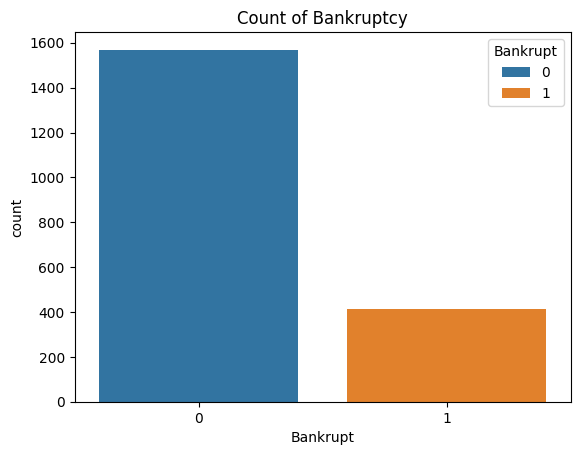

In [12]:
#Plotting a countplot for the target variable
sns.countplot(x = "Bankrupt", data = df, hue = 'Bankrupt')   
plt.title('Count of Bankruptcy')
plt.show()

In [13]:
#Percentage of defaulters
(df.Bankrupt.sum()/len(df)) * 100

20.87745839636914

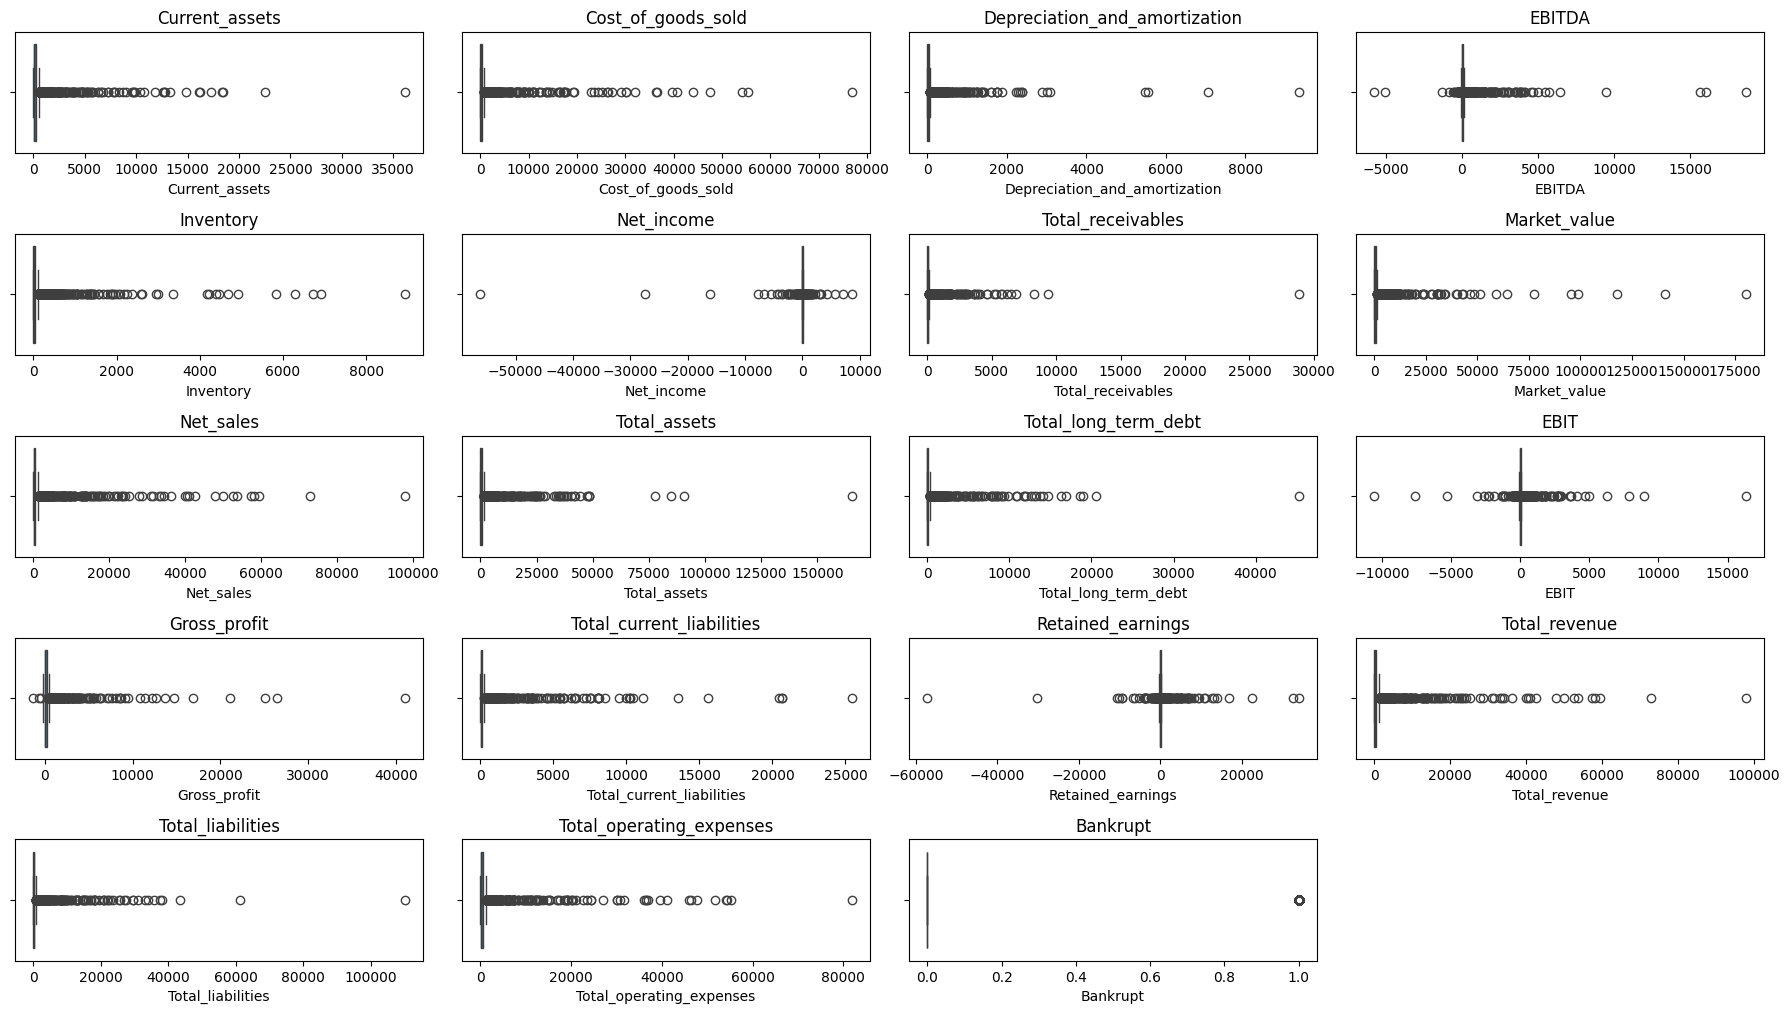

In [14]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)  
    plt.tight_layout()
    plt.title(variable)

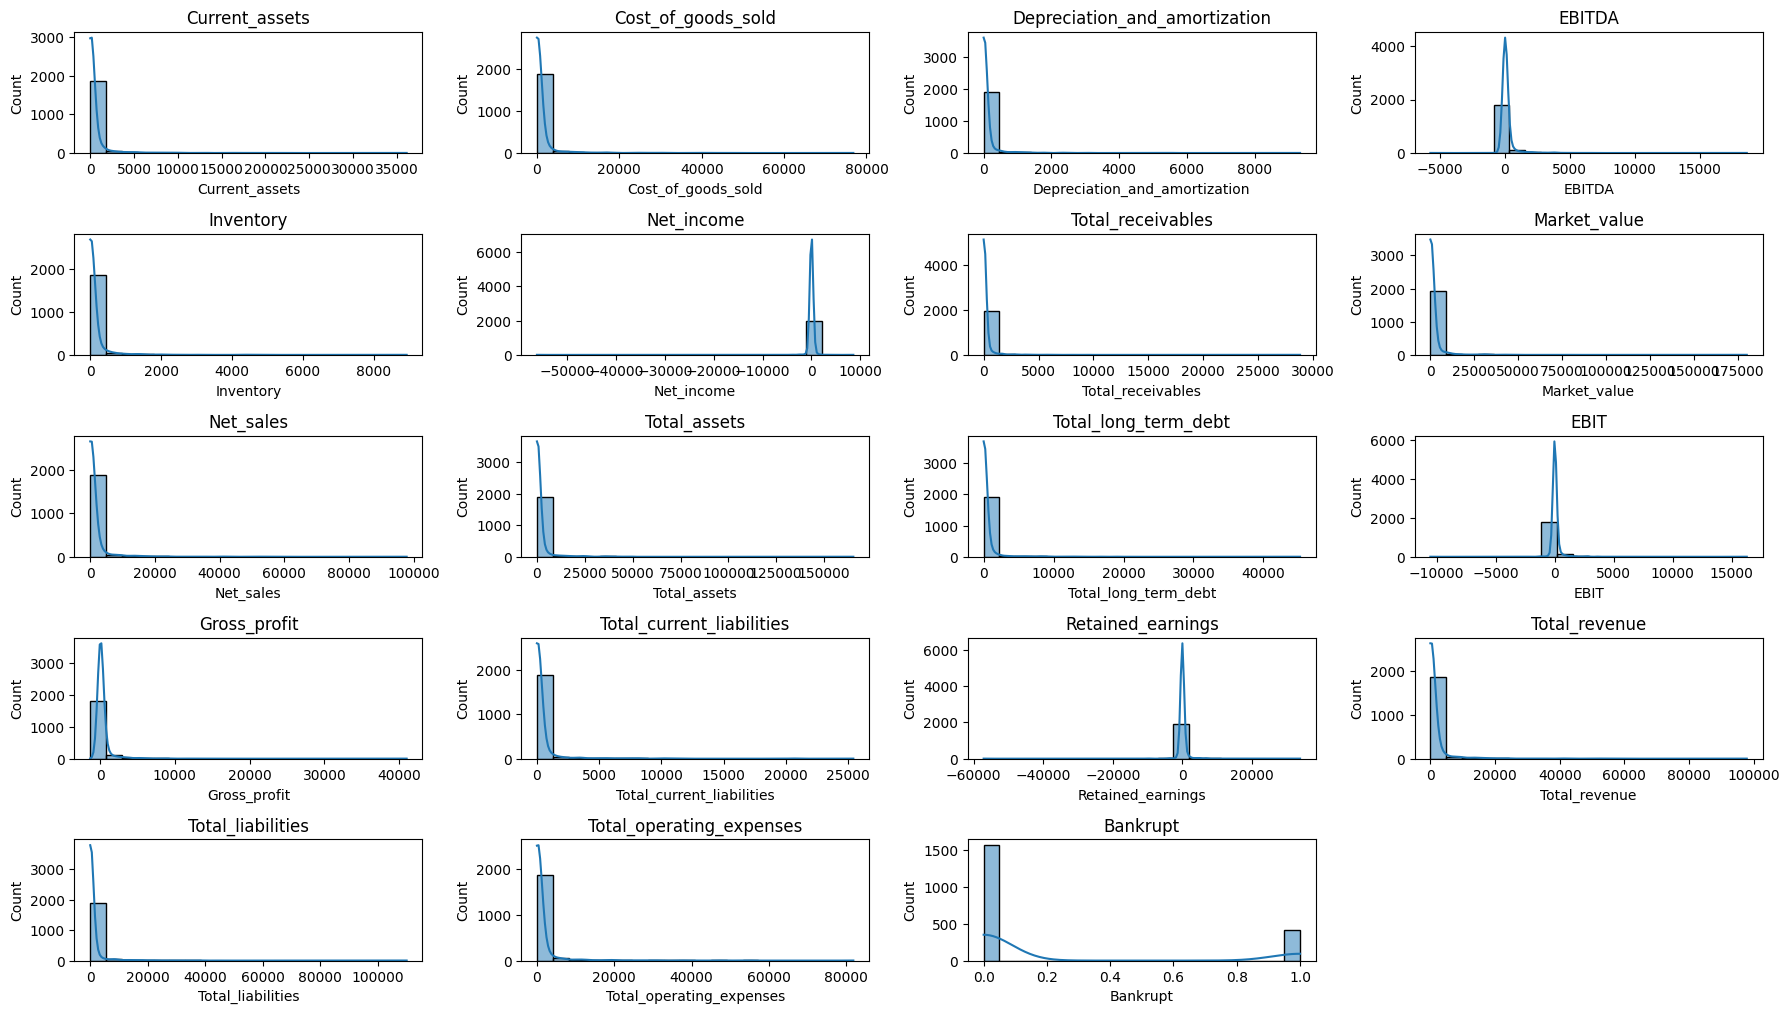

In [15]:
#Get distplot for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.histplot(data=df, x=variable, kde=True, bins=20, edgecolor='black')
    plt.tight_layout()
    plt.title(variable)

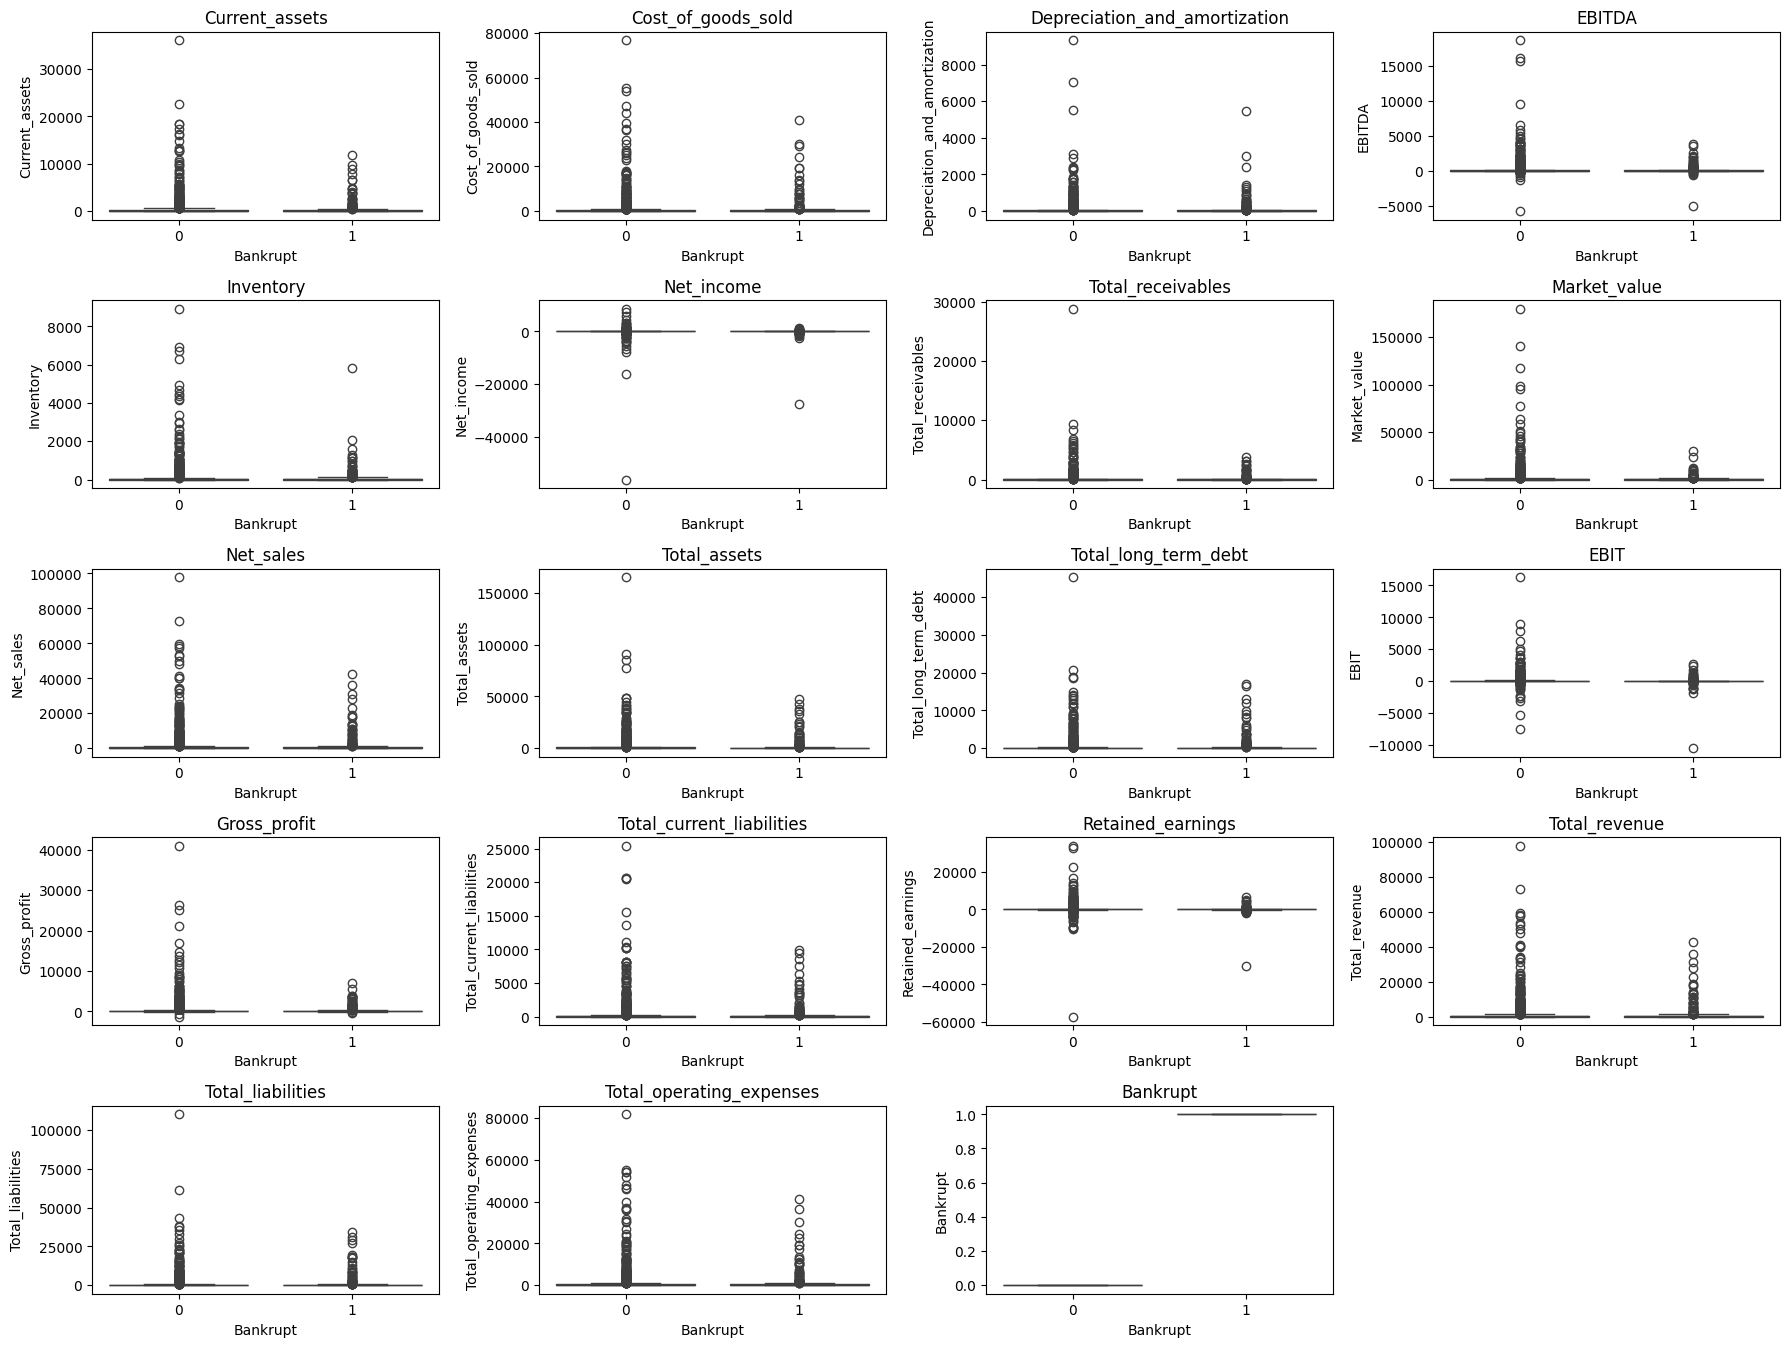

In [16]:
#Bivariate Analysis
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 40))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(x=df["Bankrupt"], y=df[variable])  
    plt.tight_layout()
    plt.title(variable)
plt.show()

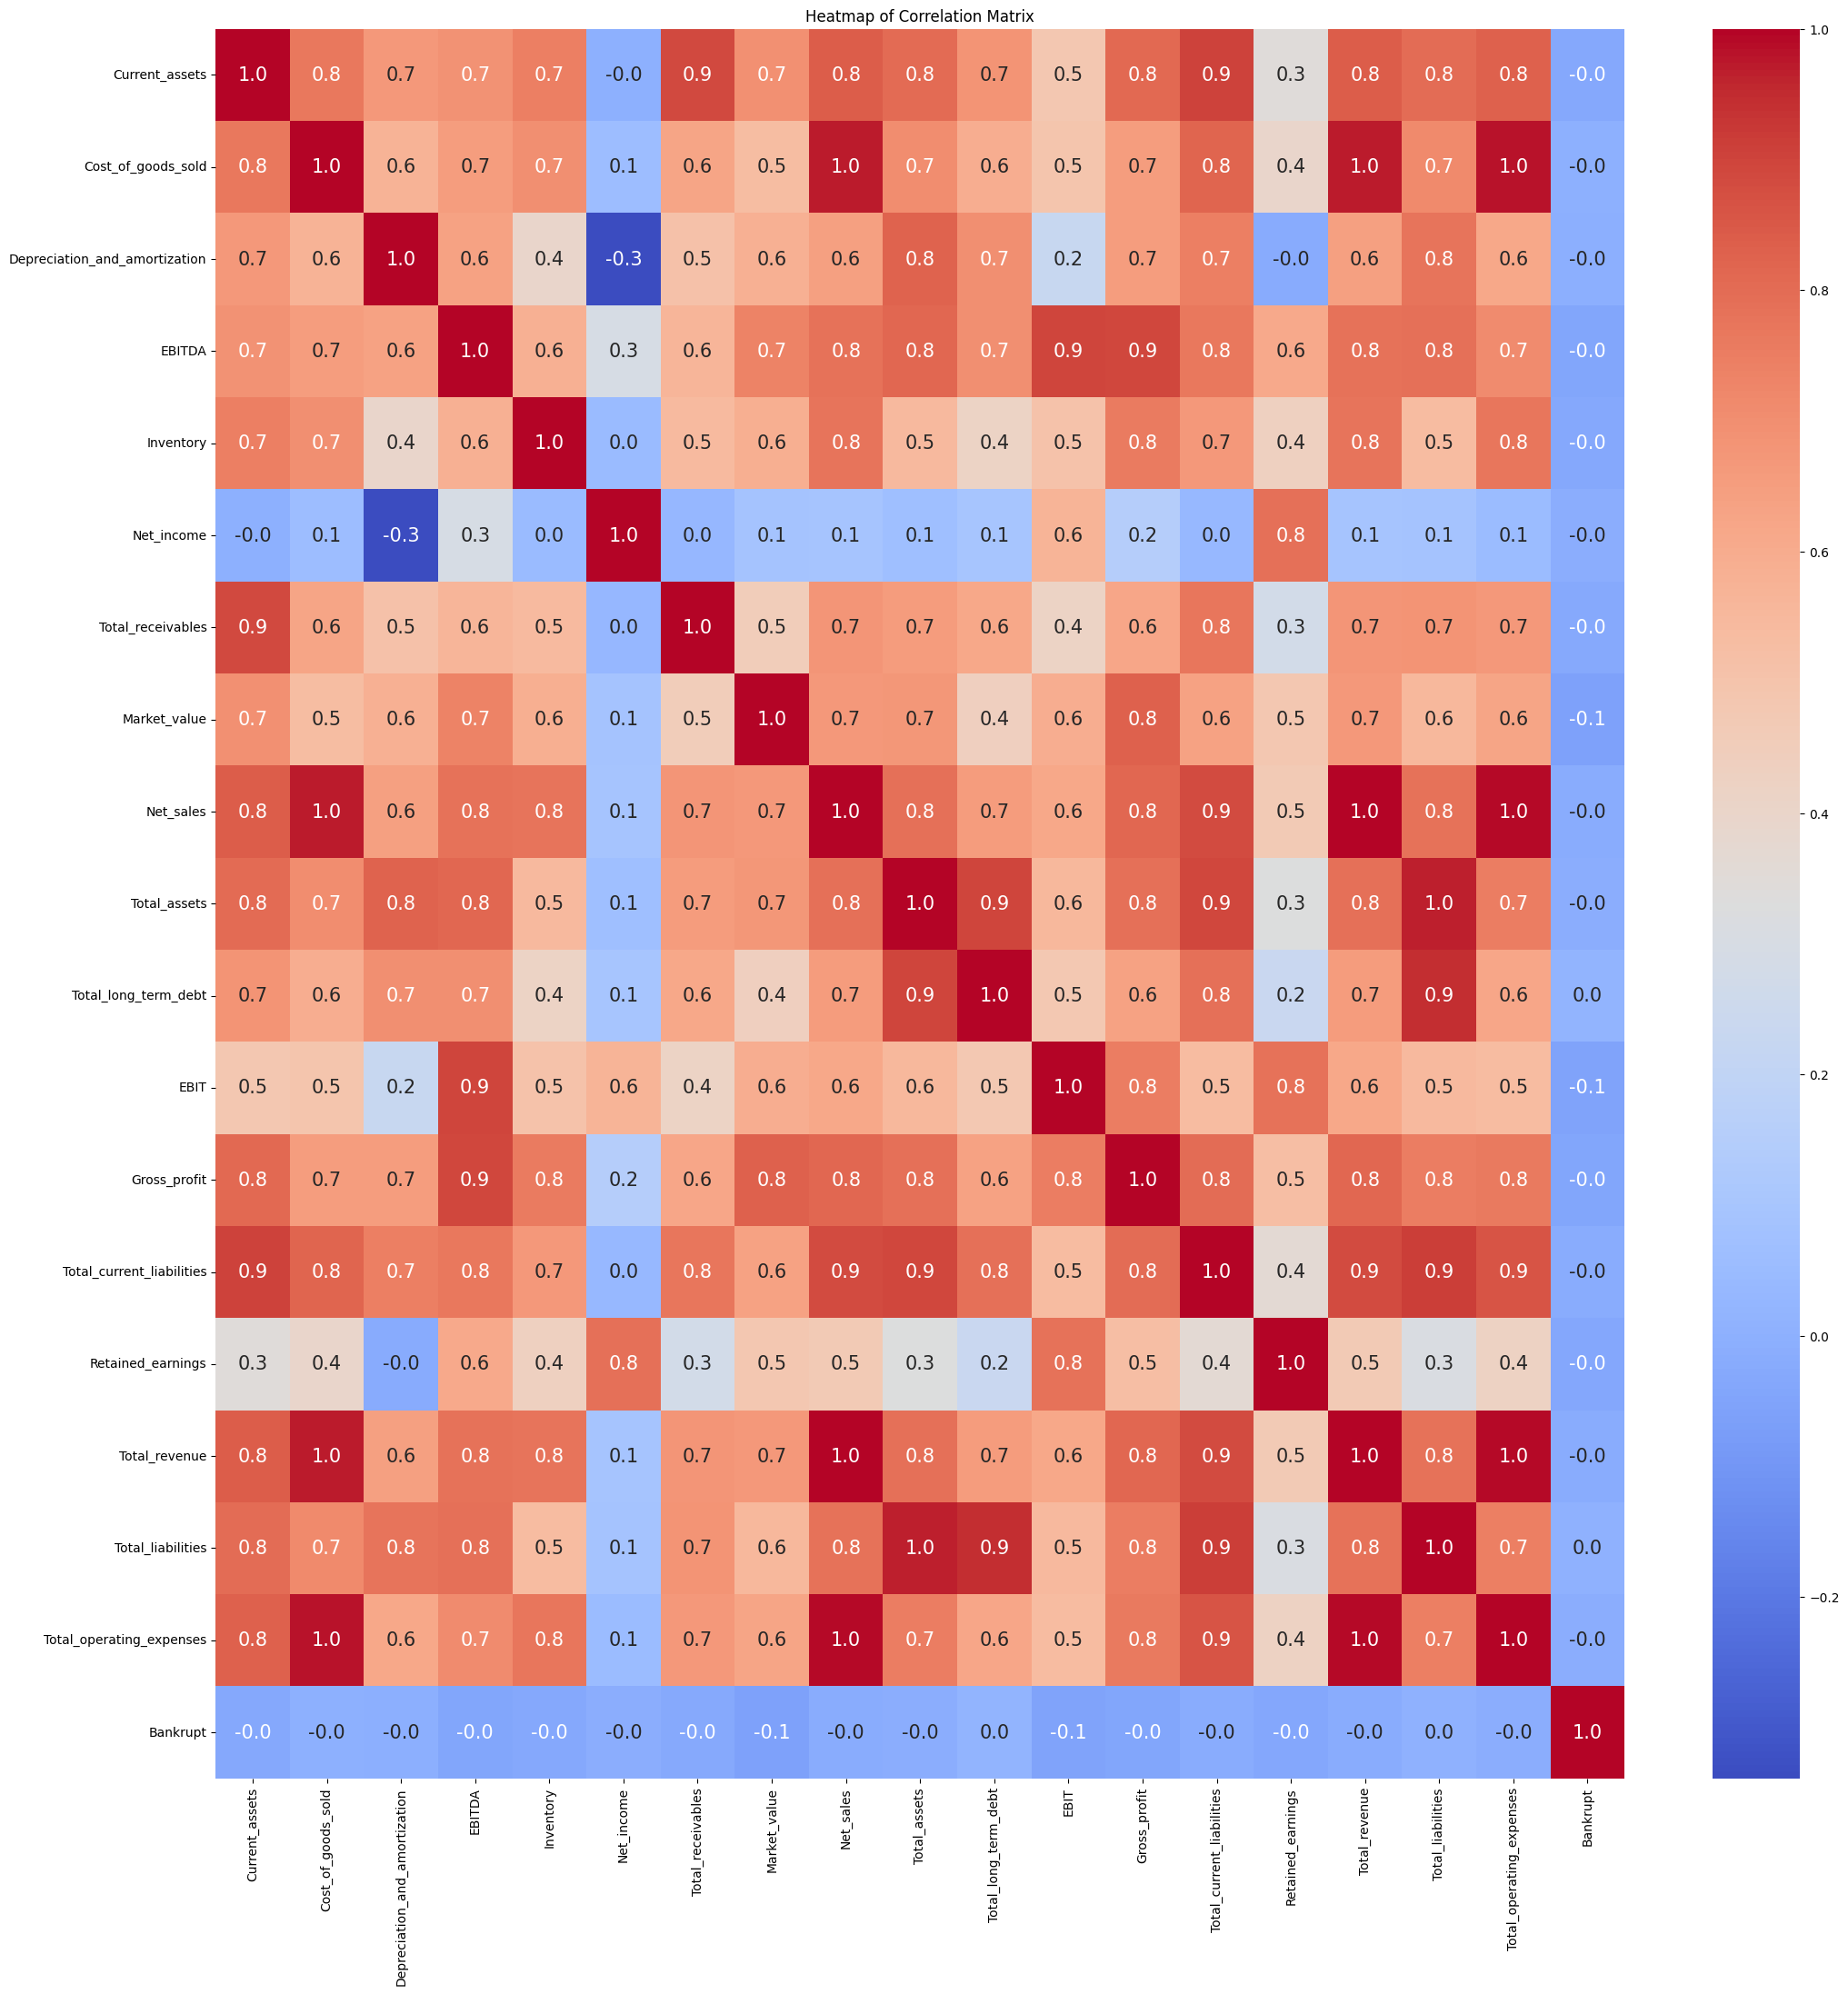

In [17]:
#Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

#Create a heatmap of the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [18]:
#Data Preprocessing
#Outliers Check
outliers_count = {}

#Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR   

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Current_assets,279
1,Cost_of_goods_sold,311
2,Depreciation_and_amortization,302
3,EBITDA,335
4,Inventory,298
5,Net_income,485
6,Total_receivables,307
7,Market_value,278
8,Net_sales,296
9,Total_assets,310


In [19]:
#Data Preparation for Modeling
#Seperating target variable from the rest of the data
df_X = df.drop(['Bankrupt'], axis = 1)
df_y = df['Bankrupt']
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42, stratify = df_y)  

In [20]:
#Missing Values Detection
#Check missing values
X_train.isnull().sum()  

Current_assets                   0
Cost_of_goods_sold               0
Depreciation_and_amortization    0
EBITDA                           0
Inventory                        0
Net_income                       0
Total_receivables                0
Market_value                     0
Net_sales                        0
Total_assets                     0
Total_long_term_debt             0
EBIT                             0
Gross_profit                     0
Total_current_liabilities        0
Retained_earnings                0
Total_revenue                    0
Total_liabilities                0
Total_operating_expenses         0
dtype: int64

In [21]:
X_test.isnull().sum()

Current_assets                   0
Cost_of_goods_sold               0
Depreciation_and_amortization    0
EBITDA                           0
Inventory                        0
Net_income                       0
Total_receivables                0
Market_value                     0
Net_sales                        0
Total_assets                     0
Total_long_term_debt             0
EBIT                             0
Gross_profit                     0
Total_current_liabilities        0
Retained_earnings                0
Total_revenue                    0
Total_liabilities                0
Total_operating_expenses         0
dtype: int64

In [22]:
print("No. of missing values in training data:", X_train.isnull().sum().sum())
print("No. of missing values in test data:", X_test.isnull().sum().sum())

No. of missing values in training data: 0
No. of missing values in test data: 0


In [23]:
#Scaling the Data
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)  

In [24]:
X_train_scaled.head()

,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,-0.159768,-0.142125,-0.234780,-0.063513,-0.113882,0.099548,-0.072098,-0.091104,-0.132506,-0.167604,-0.217799,0.022548,-0.074157,-0.203199,0.040036,-0.132506,-0.224333,-0.139028
1,-0.274514,-0.236003,-0.261220,-0.199194,-0.237175,0.000488,-0.191910,-0.198944,-0.253588,-0.267951,-0.263127,-0.139896,-0.232395,-0.251483,-0.120986,-0.253588,-0.262956,-0.253171
2,-0.175941,-0.160988,-0.136617,-0.075109,-0.078514,0.054720,-0.122962,-0.138230,-0.155378,-0.172370,-0.173698,-0.035852,-0.101208,-0.162482,0.020665,-0.155378,-0.186075,-0.162921
3,-0.274668,-0.236195,-0.261416,-0.198389,-0.237910,0.001816,-0.192215,-0.199350,-0.253852,-0.267943,-0.263127,-0.138775,-0.232771,-0.252070,-0.121302,-0.253852,-0.263176,-0.253603
4,-0.272938,-0.235566,-0.252166,-0.220011,-0.234932,-0.043588,-0.192093,-0.190211,-0.253589,-0.264987,-0.257469,-0.170631,-0.233494,-0.250024,-0.189633,-0.253589,-0.260105,-0.249713


In [25]:
X_test_scaled.head()

,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,0.961504,0.178218,1.739125,0.534310,0.435299,-0.094970,0.491741,0.398906,0.381419,0.604897,0.140906,-0.085077,0.793798,0.595817,0.761951,0.381419,0.243339,0.341795
1,-0.263573,-0.229975,-0.189535,-0.198939,-0.237910,-0.093674,-0.177780,-0.198400,-0.242869,-0.262008,-0.262274,-0.171345,-0.212647,-0.234362,-0.158177,-0.242869,-0.255829,-0.241113
2,-0.272713,-0.234976,-0.258923,-0.199232,-0.237679,-0.003717,-0.190784,-0.198345,-0.252523,-0.266531,-0.261575,-0.140962,-0.231508,-0.248233,-0.133136,-0.252523,-0.261111,-0.251962
3,-0.265103,-0.230545,-0.251250,-0.177672,-0.225244,0.016272,-0.182056,-0.185388,-0.243520,-0.255296,-0.253015,-0.116689,-0.213333,-0.248004,-0.095540,-0.243520,-0.256529,-0.245381
4,0.759964,0.384240,0.441011,0.824896,1.277753,0.613444,0.699953,0.449776,0.614304,0.551349,0.307429,0.863365,1.034145,0.559972,2.016841,0.614304,0.416513,0.556410


In [26]:
#Model Building
#Model Evaluation Criterion

#defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  #to compute Accuracy
    recall = recall_score(target, y_pred)  #to compute Recall
    precision = precision_score(target, y_pred)  #to compute Precision
    f1 = f1_score(target, y_pred)  #to compute F1-score

    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [27]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [28]:
#Logistic Regression
#Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [29]:
X_train_with_intercept.head()

,const,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,1.0,-0.159768,-0.142125,-0.234780,-0.063513,-0.113882,0.099548,-0.072098,-0.091104,-0.132506,-0.167604,-0.217799,0.022548,-0.074157,-0.203199,0.040036,-0.132506,-0.224333,-0.139028
1,1.0,-0.274514,-0.236003,-0.261220,-0.199194,-0.237175,0.000488,-0.191910,-0.198944,-0.253588,-0.267951,-0.263127,-0.139896,-0.232395,-0.251483,-0.120986,-0.253588,-0.262956,-0.253171
2,1.0,-0.175941,-0.160988,-0.136617,-0.075109,-0.078514,0.054720,-0.122962,-0.138230,-0.155378,-0.172370,-0.173698,-0.035852,-0.101208,-0.162482,0.020665,-0.155378,-0.186075,-0.162921
3,1.0,-0.274668,-0.236195,-0.261416,-0.198389,-0.237910,0.001816,-0.192215,-0.199350,-0.253852,-0.267943,-0.263127,-0.138775,-0.232771,-0.252070,-0.121302,-0.253852,-0.263176,-0.253603
4,1.0,-0.272938,-0.235566,-0.252166,-0.220011,-0.234932,-0.043588,-0.192093,-0.190211,-0.253589,-0.264987,-0.257469,-0.170631,-0.233494,-0.250024,-0.189633,-0.253589,-0.260105,-0.249713


In [30]:
y_train.reset_index(inplace = True, drop = True)

In [31]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit(method = 'bfgs')
print(LogisticReg.summary())

         Current function value: 0.497065
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 1487
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                           14
Date:                Sat, 24 May 2025   Pseudo R-squ.:                 0.02903
Time:                        14:50:29   Log-Likelihood:                -739.14
converged:                      False   LL-Null:                       -761.24
Covariance Type:            nonrobust   LLR p-value:                 5.497e-05
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.49

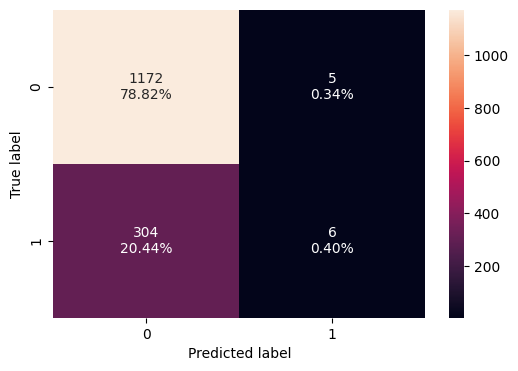

In [32]:
#Logistic Regression Model - Training Performance
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [33]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

,Accuracy,Recall,Precision,F1
0,0.792199,0.019355,0.545455,0.037383


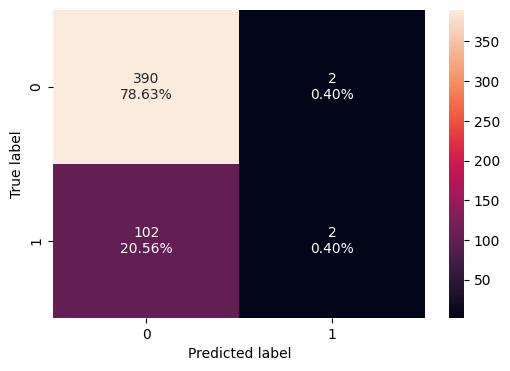

In [34]:
#Logistic Regression Model - Test Performance
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test) 

In [35]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test) 
logistic_regression_perf_test

,Accuracy,Recall,Precision,F1
0,0.790323,0.019231,0.5,0.037037


In [36]:
#Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)
rf_model = rf_classifier.fit(X_train, y_train)
rf_model

RandomForestClassifier(random_state=42)

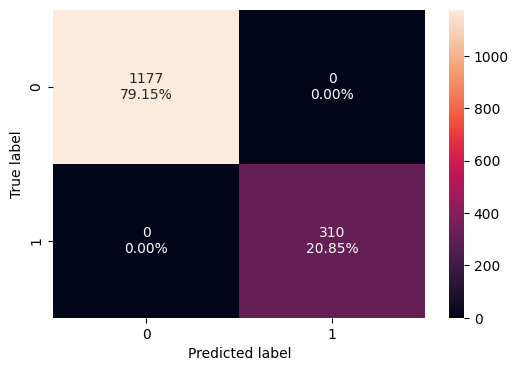

In [37]:
#Random Forest Model - Training Performance
model_confusion_matrix(rf_model, X_train, y_train)

In [38]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


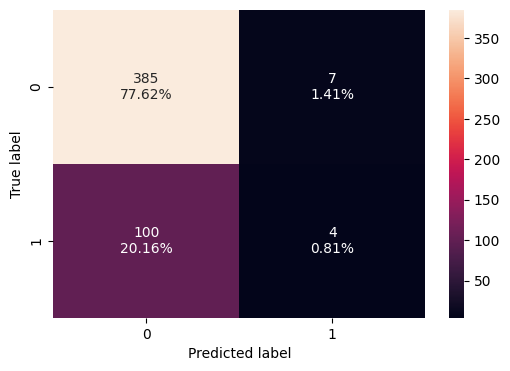

In [39]:
#Random Forest Model - Test Performance
model_confusion_matrix(rf_model, X_test, y_test)  

In [40]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)  
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.784274,0.038462,0.363636,0.069565


In [41]:
#Model Performance Improvement
#Model Performance Improvement - Logistic Regression
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [42]:
#Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


,Variable,VIF
0,Current_assets,30.238097
1,Cost_of_goods_sold,inf
2,Depreciation_and_amortization,inf
3,EBITDA,inf
4,Inventory,5.994164
5,Net_income,7.412527
6,Total_receivables,10.476996
7,Market_value,8.578420
8,Net_sales,inf
9,Total_assets,27.446399


In [43]:
#Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping Cost_of_goods_sold due to high VIF
Dropping Depreciation_and_amortization due to high VIF
Dropping EBITDA due to high VIF
Dropping Net_sales due to high VIF
Dropping Total_revenue due to high VIF
Dropping Total_liabilities due to high VIF
Dropping Current_assets due to high VIF
Dropping Gross_profit due to high VIF
Dropping Total_assets due to high VIF
Dropping Total_current_liabilities due to high VIF
Dropping EBIT due to high VIF


In [44]:
print(f"There are {X_train_scaled.shape[0]} records in the Train Dataset and {X_test_scaled.shape[0]} records in the Test Dataset. \nBoth the datsets have {X_train_scaled.shape[1]} variables.")

There are 1487 records in the Train Dataset and 496 records in the Test Dataset. 
Both the datsets have 7 variables.


In [45]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [46]:
#Retraining Logistic Regression Model with new data
LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit(method = 'bfgs')
print(LogisticReg_improved.summary())

         Current function value: 0.501131
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 1487
Model:                          Logit   Df Residuals:                     1479
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 May 2025   Pseudo R-squ.:                 0.02109
Time:                        14:50:36   Log-Likelihood:                -745.18
converged:                      False   LL-Null:                       -761.24
Covariance Type:            nonrobust   LLR p-value:                 3.879e-05
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4801      0.084  

In [47]:
#Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.215

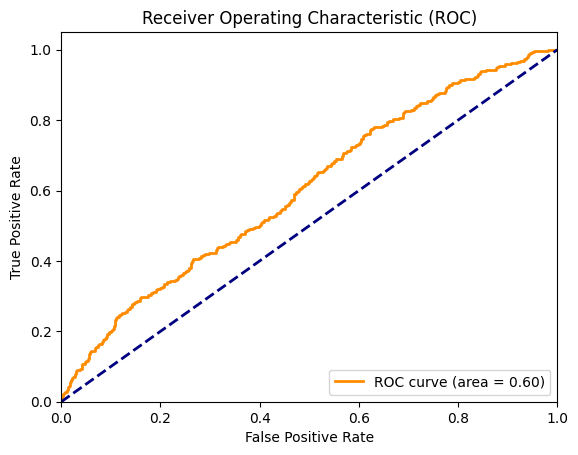

In [48]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

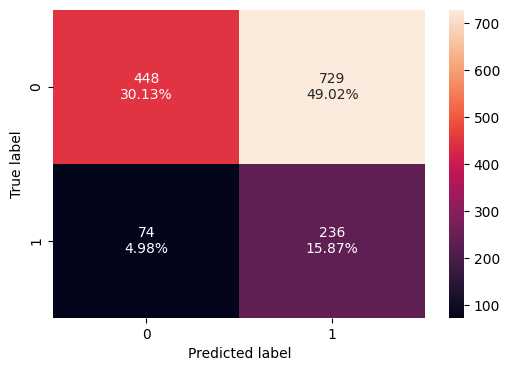

In [49]:
#Logistic Regression Performance - Training Set
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [50]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.459987,0.76129,0.24456,0.370196


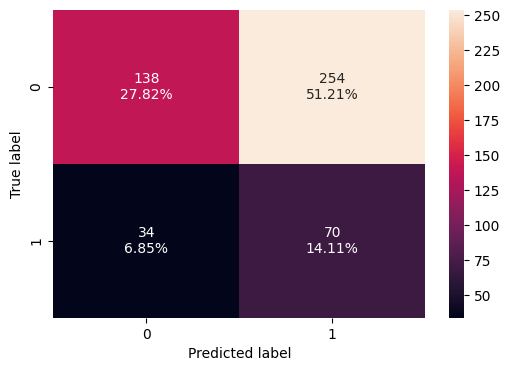

In [51]:
#Logistic Regression Performance - Test Set
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit) 

In [52]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  
logistic_regression_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.419355,0.673077,0.216049,0.327103


In [53]:
#Model Performance Improvement - Random Forest

param_grid = {
    'n_estimators': [100, 150, 200],  #Number of trees in the forest
    'max_depth': [5, 6, 7, 8],    #Maximum depth of the trees
    'min_samples_split': [2, 4, 5, 7, 10],    #Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7, 9],  #Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
#Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [55]:
params_used = best_rf_classifier.get_params()
params_used = best_rf_classifier.get_params()

#Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")
#Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 9
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False
Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 9
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


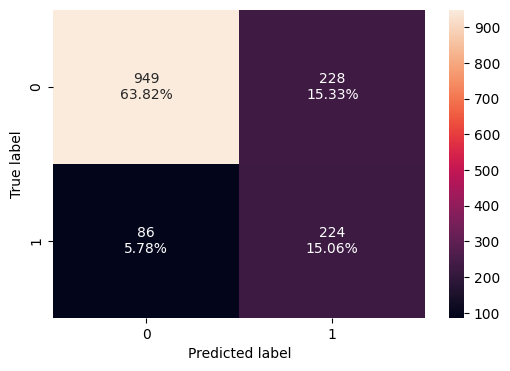

In [56]:
#Random Forest Performance - Training Set
model_confusion_matrix(best_rf_classifier, X_train, y_train)  

In [57]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)  
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.788837,0.722581,0.495575,0.587927


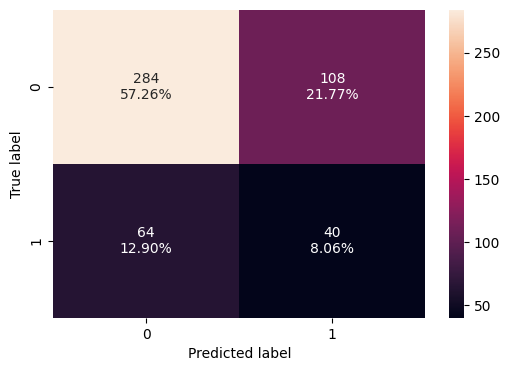

In [58]:
#Random Forest Performance - Test Set
model_confusion_matrix(best_rf_classifier, X_test, y_test)  

In [59]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)  
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.653226,0.384615,0.27027,0.31746


In [60]:
#Model Comparison and Final Model Selection
#training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.792199,0.459987,1.0,0.788837
Recall,0.019355,0.761290,1.0,0.722581
Precision,0.545455,0.244560,1.0,0.495575
F1,0.037383,0.370196,1.0,0.587927


In [61]:
#testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.790323,0.419355,0.784274,0.653226
Recall,0.019231,0.673077,0.038462,0.384615
Precision,0.500000,0.216049,0.363636,0.270270
F1,0.037037,0.327103,0.069565,0.317460


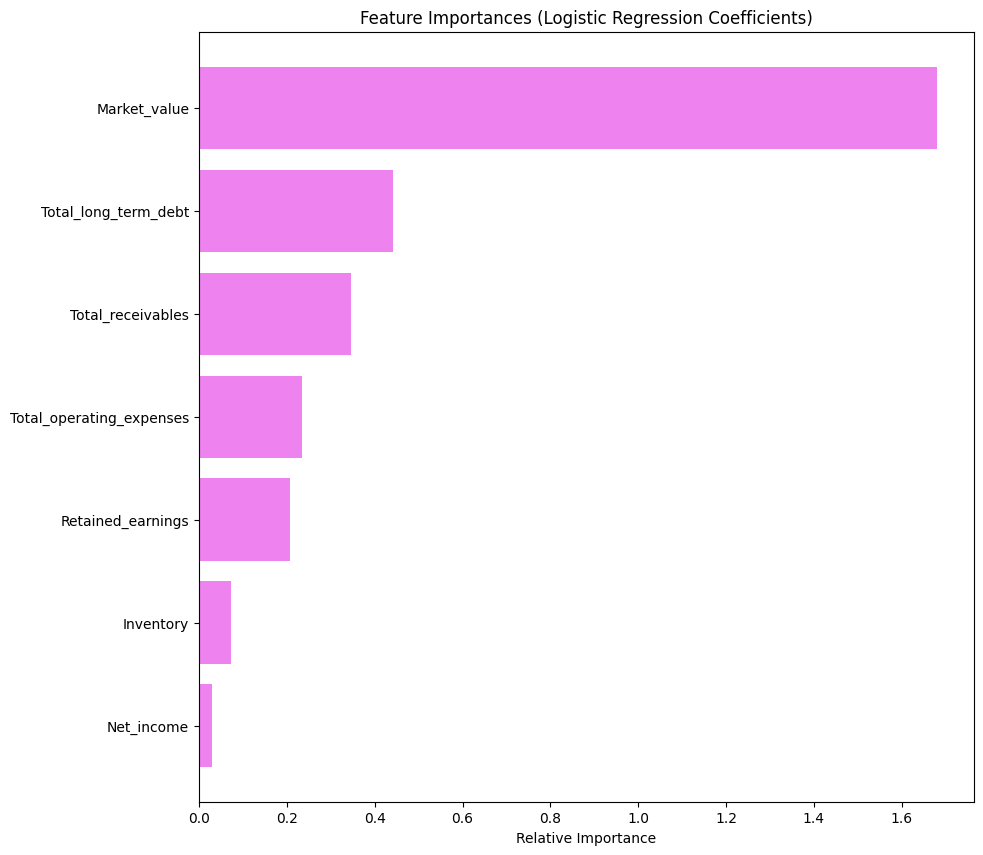

In [62]:
#Feature Importance for Best Model

coefficients = LogisticReg_improved.params.values[1:]  #Exclude the constant term
relative_importance = np.abs(coefficients)
feature_names = X_train_new_with_intercept.columns[1:]
indices = np.argsort(relative_importance)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances (Logistic Regression Coefficients)")
plt.barh(range(len(indices)), relative_importance[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

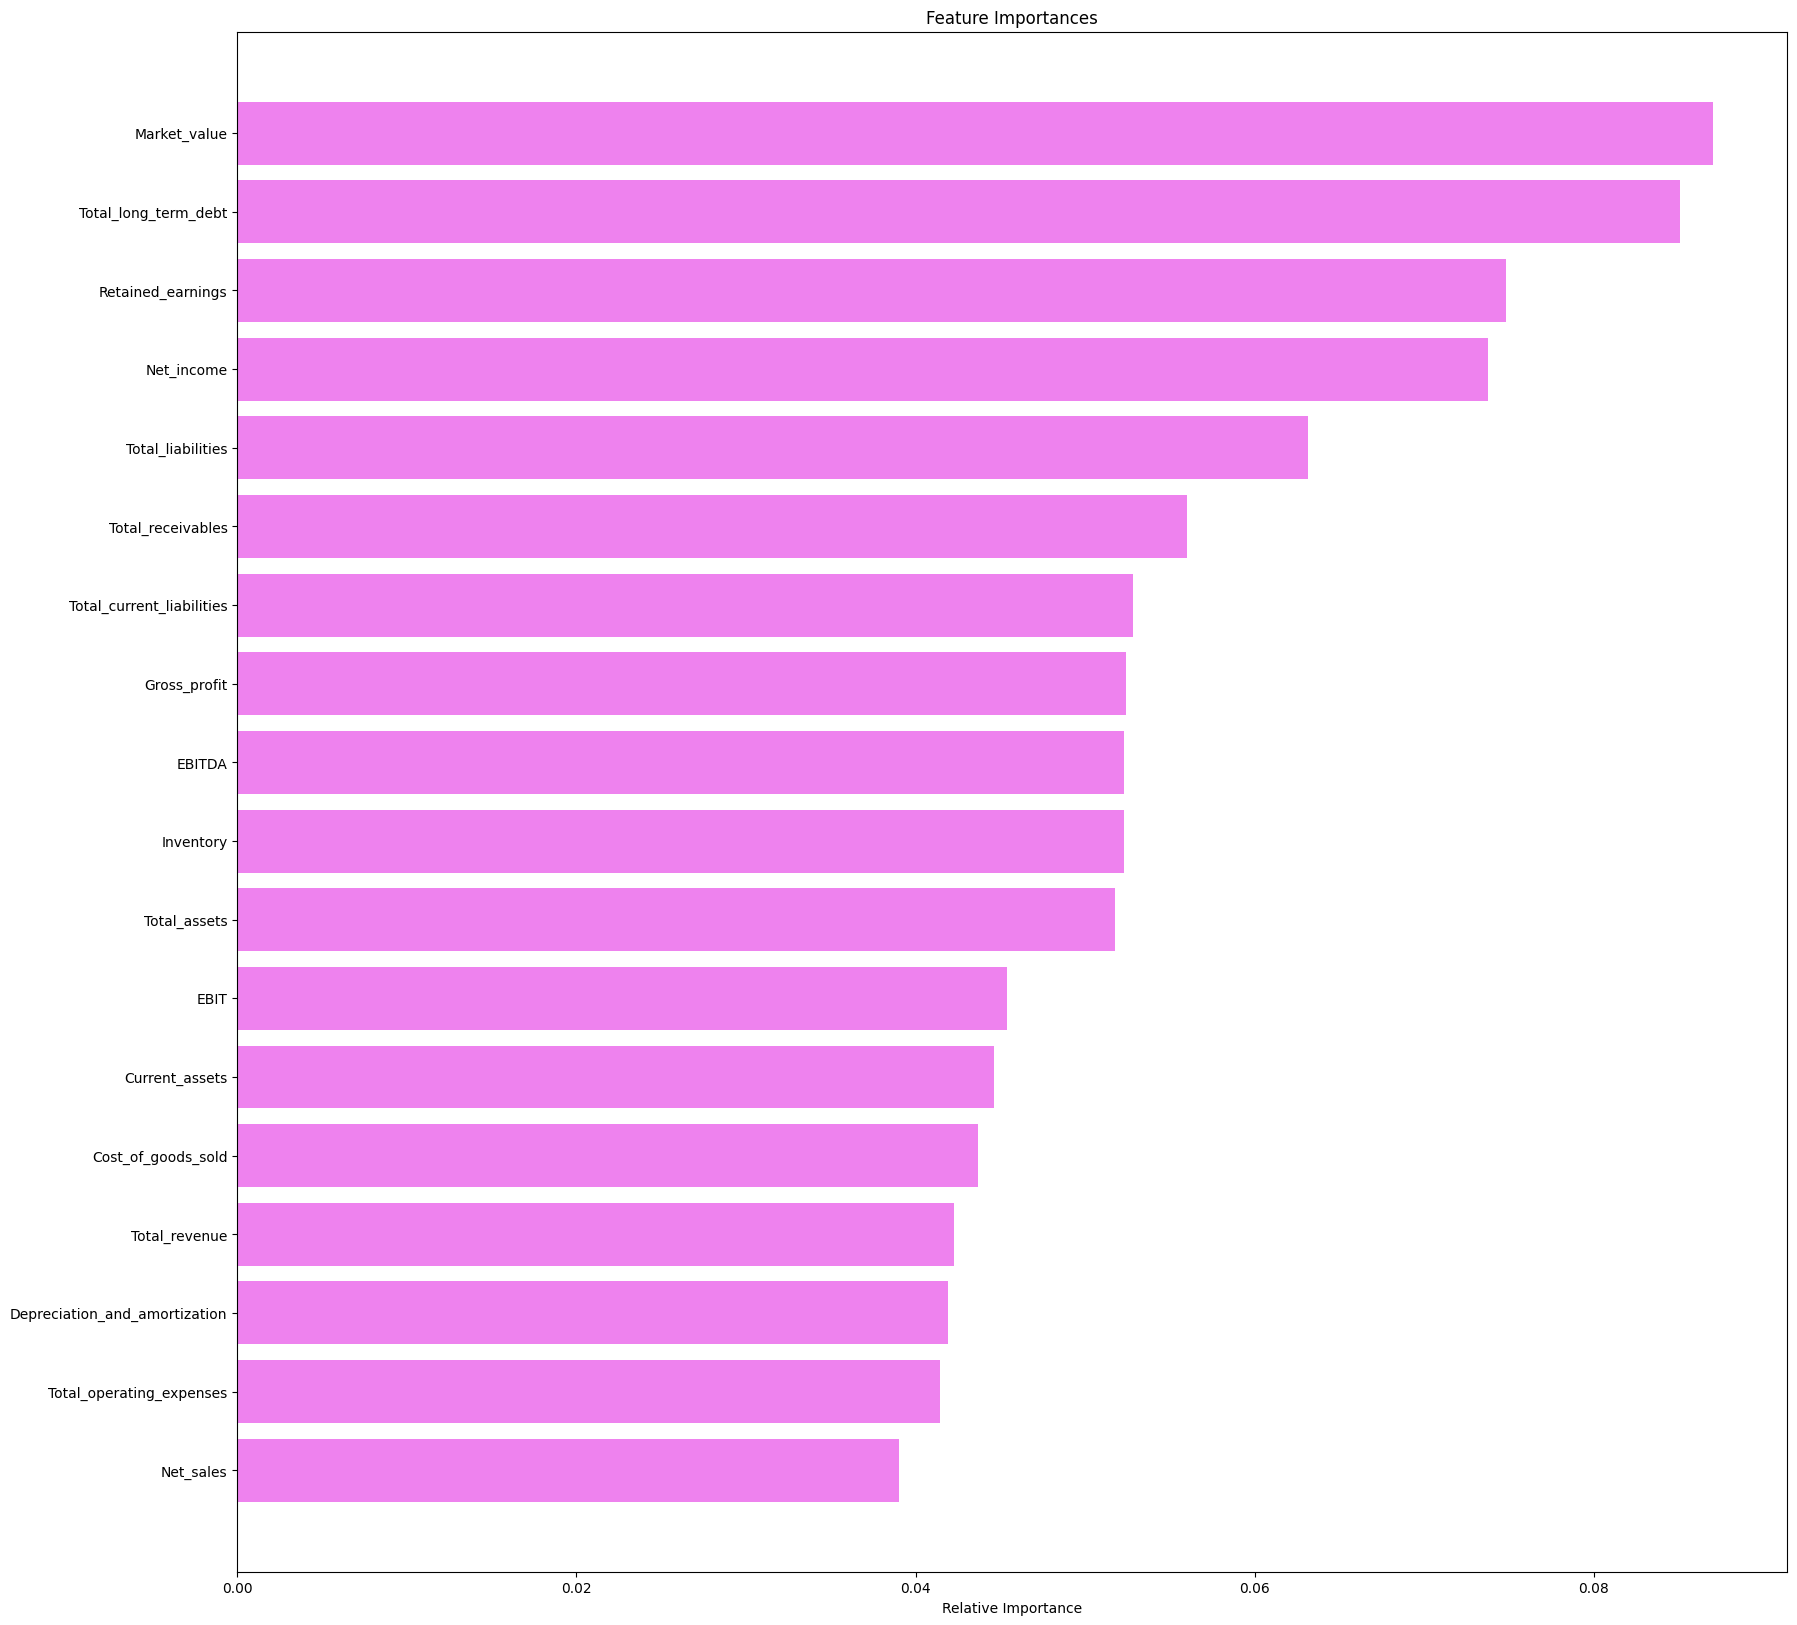

In [63]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()